<a href="https://colab.research.google.com/github/Kavya2099/mlbookcamp/blob/model-predictions/Evaluation_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

get data

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'

!wget $data -O data-week-3.csv 

df= pd.read_csv('data-week-3.csv')

df.head()

--2022-10-04 05:51:29--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.03s   

2022-10-04 05:51:29 (28.2 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

df.columns= df.columns.str.replace(" ","_").str.lower()
df.columns

strings= list(df.dtypes[df.dtypes=='object'].index)

for col in strings:
  df[col]= df[col].str.replace(" ","_").str.lower()

df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [ ]:
df.dtypes


customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

Changing the data type of monthly charges and churn columns to int

In [ ]:
df.monthlycharges = df.monthlycharges.astype('int')
df.monthlycharges
df.churn = (df.churn=='yes').astype('int')
df.monthlycharges.dtype

dtype('int64')

Setting up the validation framework

spliting train, val and test data sets

In [ ]:
X= df.drop(['churn'],axis=1)
y= df.churn

from sklearn.model_selection import train_test_split

def split(X,y):


  full_X_train, X_val, full_y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=0)
  X_train, X_test, y_train , y_test = train_test_split(full_X_train,full_y_train,test_size=0.25, random_state=0)
  return (X_train, X_val, y_train , y_val)




In [ ]:
#len(X_train),len(X_val),len(X_test)

Exploratory data analysis

Checking for missing values

In [ ]:
df.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

There is no null values.
1st method. Doing random forest by taking all features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

#defining random forest model
def randommodel(X_train, X_val, y_train , y_val):
  model1= RandomForestClassifier(random_state=0)
  model1.fit(X_train, y_train)
  pred = model1.predict(X_val)

  
  print('ACCURACY: ',accuracy_score(pred,y_val)*100)
  

# calling model with all features
X= df.drop(['churn'],axis=1)
y= df.churn
X_train, X_val, y_train , y_val = split(X,y)
#model(X_train, X_val, y_train , y_val)




As we can see we are getting error:
1.   ValueError: could not convert string to float: '7544-zvikx'

So we have to either drop this feature (customer id)or factorize/hot encode  the feature



In [ ]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56,1889.5,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70,151.65,1


As we can see there are lot of catergorical variables and numerical variables in df. 

1.   So we'll split them separately and for categorical features we will only use categorical features which has less than 10 unique features, since more than that may not be appear in validation/test test and it can create error




In [ ]:
# splitting numerical and categorical features


num_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64','float64']]
print(num_cols)

cat_cols= [col for col in X_train.columns if (X_train[col].dtype == 'object' and X_train[col].nunique() < 10)]
print(cat_cols)

#We'll only use these columns to train the model and validate the model

cols = num_cols + cat_cols
X_train_1 = X_train[cols]
X_val_1 = X_val[cols]


['seniorcitizen', 'tenure', 'monthlycharges']
['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


Still, our problem hasn't solved, so now we'll train the model only using numerical feature and check the error output

In [ ]:
X = df[num_cols]
y = df['churn']

#calling model1 with using numerical features

X_train, X_val, y_train , y_val = split(X,y)
randommodel(X_train, X_val, y_train , y_val)

ACCURACY:  74.59190915542938


We got accuracy to be 74.59190915542938 for random forest classifier model.
Now we'll try the same with logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression  

#defining logistic model
def logisticmodel(X_train, X_val, y_train , y_val):
  model1= LogisticRegression(max_iter=100)
  model1.fit(X_train, y_train)
  pred = model1.predict(X_val)

  
  print('ACCURACY: ',accuracy_score(pred,y_val)*100)

In [ ]:
X = df[num_cols]
y = df['churn']

#calling model1 with using numerical features

X_train, X_val, y_train , y_val = split(X,y)
logisticmodel(X_train, X_val, y_train , y_val)

ACCURACY:  77.9985805535841


So first level analysis

with only using numerical features

1. Random forest classifier = 74.59190915542938
2. Logistic regression = 77.9985805535841

Other ways to improve the model 

We'll be using feature importance analysis topics to impove the accuracy

Mutual Information

In [ ]:
#changing object dtype to int type using factorize 
X = df.drop(['churn'],axis=1)
mi= X
for col in mi.select_dtypes('object'):
  mi[col],_ = mi[col].factorize()

discrete_feature= mi.dtypes == int

from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(mi,y)
mi_scores= pd.Series(mi_scores, name='mi_scores',index=mi.columns)
mi_scores= mi_scores.sort_values(ascending=False)
print(mi_scores)

contract            0.091739
onlinesecurity      0.073195
tenure              0.068348
techsupport         0.057317
internetservice     0.055565
monthlycharges      0.044896
onlinebackup        0.044225
deviceprotection    0.042753
paymentmethod       0.038445
streamingmovies     0.027286
streamingtv         0.025292
dependents          0.018521
paperlessbilling    0.016763
seniorcitizen       0.015564
multiplelines       0.013031
partner             0.011401
phoneservice        0.002631
customerid          0.000000
gender              0.000000
totalcharges        0.000000
Name: mi_scores, dtype: float64


Checking correlation with numerical variables

In [ ]:
# numerical variables

df[num_cols].corrwith(df.churn)

seniorcitizen     0.150889
tenure           -0.352229
monthlycharges    0.193422
dtype: float64

This shows tenure has negative coreleation with churn rate and seniorcitizen and monthly charges has positive corelation with churn rate



1.   High churn low tenure
2.   High churn high monthly charges/senior citizen



Also, we have verified that features that has high MI is included in the cols[num+cat]

We'll use pipeline to do encoding with num and cat features

1. with random forest classifier

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

X = df[cols]
y = df['churn']

#calling model1 with using numerical features

X_train, X_val, y_train , y_val = split(X,y)


# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

model= RandomForestClassifier(random_state=0)


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_val)

print('ACCURACY: ',accuracy_score(preds,y_val)*100)

ACCURACY:  77.2888573456352


We'll try the same with logistic model

In [ ]:
X = df[cols]

#print(X.columns)
y = df['churn']

#calling model1 with using numerical features

X_train, X_val, y_train , y_val = split(X,y)


# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

model= LogisticRegression(max_iter=100)


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_val)

print('ACCURACY: ',accuracy_score(preds,y_val)*100)

ACCURACY:  79.84386089425124


Accuracy of pipeline with RF classifier is 77.2888573456352

whereas for logistic regression is same 79.84386089425124




Next, we'll try XGB classifier with the num+cat

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
#one hot encoding
X= df[cols]
X = pd.get_dummies(X, columns=cols)
X_train, X_val, y_train , y_val = split(X,y)

xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)

ACCURACY:  79.4889992902768


XGB classifier gives 79.4889992902768

We'll just check what will be the case if we use all the features in XGB classifier instead of just all columns

In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
#one hot encoding
X=df.drop(['churn'],axis=1)
X = pd.get_dummies(X)
X_train, X_val, y_train , y_val = split(X,y)

xgb_model.fit(X_train, y_train)
prediction_xgb = xgb_model.predict(X_val)
print('ACCURACY: ',accuracy_score(y_val, prediction_xgb)*100)

ACCURACY:  78.85024840312278


This gives accuracy of 78.85024840312278 and is less compared to using only specific features

We'll just the same for RF and logistic regression

In [ ]:
X=df.drop(['churn'],axis=1)
X = pd.get_dummies(X)
X_train, X_val, y_train , y_val = split(X,y)
print('random forest classifier')
randommodel(X_train, X_val, y_train , y_val)


random forest classifier
ACCURACY:  78.49538679914833


In [ ]:
X=df.drop(['churn'],axis=1)
X = pd.get_dummies(X)
print(X.shape)
X_train, X_val, y_train , y_val = split(X,y)
print('logistic regressor')
logisticmodel(X_train, X_val, y_train , y_val)

(7043, 13618)
logistic regressor
ACCURACY:  79.13413768630234


with only cat+num features

In [ ]:
X= df[cols]
X = pd.get_dummies(X, columns=cols)
print(X.shape)
X_train, X_val, y_train , y_val = split(X,y)
print('random forest classifier')
randommodel(X_train, X_val, y_train , y_val)


(7043, 215)
random forest classifier
ACCURACY:  76.72107877927608


In [ ]:
X= df[cols]
X = pd.get_dummies(X, columns=cols)
X_train, X_val, y_train , y_val = split(X,y)
print('logistic regressor')
logisticmodel(X_train, X_val, y_train , y_val)

logistic regressor
ACCURACY:  78.99219304471256


with only using numerical features

1. Random forest classifier = 74.59190915542938
2. Logistic regression = 77.9985805535841



---


with only using specific features

Random forest classifier = 76.72107877927608

Logistic regression = 78.99219304471256

**XGB classifier = 79.4889992902768**



---
with pipeline only using specific features

Random forest classifier = 77.2888573456352

**Logistic regression = 79.84386089425124**

---

with all features

Random forest classifier = 78.49538679914833

Logistic regression = 79.13413768630234

XGB classifier = 78.85024840312278

In [ ]:
X= df[cols]
y= df.churn
X = OneHotEncoder().fit_transform(X)
print(X.shape)
X_train, X_val, y_train , y_val = split(X,y)
print('random forest classifier')
randommodel(X_train, X_val, y_train , y_val)

(7043, 215)
random forest classifier
ACCURACY:  76.72107877927608


In [ ]:
X= df[cols]
y= df.churn
X = OneHotEncoder().fit_transform(X)
print(X.shape)
X_train, X_val, y_train , y_val = split(X,y)
print('logistic regression')
logisticmodel(X_train, X_val, y_train , y_val)

(7043, 215)
logistic regression
ACCURACY:  78.99219304471256


lets test the model

we'll use pipeline with logistic regression as it gave the max accuracy

In [ ]:

X = df[cols]

#print(X.columns)
y = df['churn']

#calling model1 with using numerical features

full_X_train, X_val, full_y_train, y_val = train_test_split(X,y,test_size=0.2, random_state=0)
X_train, X_test, y_train , y_test = train_test_split(full_X_train,full_y_train,test_size=0.25, random_state=0)
  


# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

model= LogisticRegression(max_iter=100)


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ])

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_test)
p=preds

print('ACCURACY: ',accuracy_score(preds,y_test)*100)

ACCURACY:  79.98580553584102


Accuracy with test set 79.98580553584102



In [ ]:
preds1 = my_pipeline.predict(X_val)

Now lets check with single data

In [ ]:
# 10th data

customer = X_test.iloc[10]
customer

seniorcitizen                      0
tenure                             7
monthlycharges                    79
gender                        female
partner                           no
dependents                        no
phoneservice                     yes
multiplelines                     no
internetservice          fiber_optic
onlinesecurity                    no
onlinebackup                      no
deviceprotection                  no
techsupport                       no
streamingtv                       no
streamingmovies                  yes
contract              month-to-month
paperlessbilling                 yes
paymentmethod       electronic_check
Name: 1253, dtype: object

In [ ]:
customer.shape
#(18,)
# the reason we are changing it to dataframe is that single data record is considered as 18 rows and is in 1d. We cannot use that to predict the value. 
#So we are changing it to 2d using dataframe
df_small = pd.DataFrame([customer])
df_small.shape

(1, 18)

In [ ]:
preds = my_pipeline.predict(df_small)

preds= int(preds)
print("predicted value: ",preds)
print("actual value: ",y_test.iloc[10])





predicted value:  1
actual value:  1


We'll check for the last data

In [ ]:
customer = X_test.iloc[-1]

df_small = pd.DataFrame([customer])
df_small.shape

preds = my_pipeline.predict(df_small)
preds= int(preds)
print("predicted value: ",preds)
print("actual value: ",y_test.iloc[-1])

predicted value:  0
actual value:  0




# **Evaluation Metrics**






We'll continue from the exercise 3 model

#1. Accuracy

In [ ]:
y_test.mean()

0.2590489709013485

In [ ]:
1- y_test.mean()

0.7409510290986515

in test data it is said that, 25.9 % people are likely to churn and 74% are not churning

Lets check for model predicted value

In [ ]:
p.mean()

0.20794889992902768

In [ ]:
1- p.mean()

0.7920511000709723

In our model, 20.7 % people are likely to churn and 79.2 % are not churning

## 2.Confusion matrix



1.   Different types of errors and correct decisions
2. Arranging them in a table



In [ ]:
actual_positive= (y_val==1)
actual_negative= (y_val==0)


In [ ]:
t=0.5
pred_positive= (preds1>=t)
pred_negative=(preds1<t)

In [ ]:
tp= (pred_positive & actual_positive).sum()
tn= (pred_negative & actual_negative).sum()
fn= (pred_negative & actual_positive).sum()
fp= (pred_positive & actual_negative).sum()


In [ ]:
confusion_matrix = np.array([[tp,fn]
                             ,[fp,tn]])
confusion_matrix

array([[190, 178],
       [106, 935]])

In [ ]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.13, 0.13],
       [0.08, 0.66]])

66% wont churn, 13% will churn, 8% will not churn but we are sending discounts to them(fp), 13% will churn (fn)

# Precison and Recall

precision - fraction of positive prediction that are correct

recall - fraction of correctly identified positive examples

In [ ]:
precision = tp/(tp+fp)
precision

0.6418918918918919

In [ ]:
tp+fp

296

In [ ]:
tp

190

Precision denotes we are going to send promotion emails to 296 people and only 190 people are likely to churn (64%)

36% are false....

In [ ]:
r = tp / (tp + fn)
r

0.5163043478260869

In [ ]:
tp+fn

368

51.6 % we are sending promotional mails but 48.4% we have failed to send

Acuuracy we got is 80% almost but when we look at precisiona and recall, it was not good. Accuracy can be sometimes misleading

Using sklearn methods

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, preds1))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
#predc = pd.Series(preds1)
#r= y_val.to_numpy
confusion_matrix(y_val,preds1)
#pd.crosstab(y_val, preds1, rownames = ['Actual'], colnames =['Predicted'], margins = True)


array([[935, 106],
       [178, 190]])

# ROC and AUC score

ROC stands for receiver opearting characteristic curve 
AUC- Area under curve (should be >0.6)

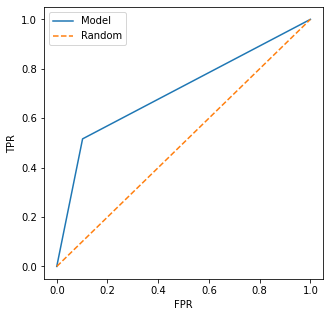

In [ ]:
#ROC curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, preds1)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [ ]:
#AUC score

from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, preds1)

0.707239589859249

# Cross Validation

In [ ]:
from sklearn.pipeline import Pipeline

X = df[cols]

#print(X.columns)
y = df['churn']
X = OneHotEncoder().fit_transform(X)
#X_train, X_val, y_train , y_val = split(X,y)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [ ]:
from sklearn.model_selection import cross_val_score

k_scores=[]

score = cross_val_score(model,X,y,cv=5,scoring='roc_auc')
k_scores.append(score)
print(score)

[0.84966674 0.85597794 0.82101966 0.8375905  0.83370225]


In [ ]:
print('%.3f +- %.3f' % (np.mean(k_scores), np.std(k_scores)))

0.840 +- 0.012


This indicates the mean of auc and std of auc

If auc gets around 1, it is a good model. In our case its 0.84

We can change the C value at different values and get the best value where the mean comes around 1 like how we did in homework exercise